## Previsão de cancelamento de conta em e-commerce (churn) a fim de realizar ações preventivas
 - Projeto de Disciplina - Redes neurais com TensorFlow [25E3_2]
 - Aluna: Rosana Ribeiro Lima
 - Dataset: https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

------
### Pitch de negócio

##### Problema:

Com frequência, diversas empresas perdem receitas por cancelamento de clientes insatisfeitos, sejam empresas de telecomunicações, de streaming, bancos, e-commerce, entre outras. Sabe-se que o custo da aquisição de um novo cliente é maior do que o custo de manutenção dos clientes atuais (ações de marketing, campanhas, ações promocionais, etc). Mas muitas vezes, esse acompanhamento e monitoramento da saúde do relacionamento com o cliente é algo difícil.

Seria útil para as empresas se elas pudessem saber previamente quais clientes estão mais propensos ao cancelamento de um serviço, para que assim possam realizar ações preventivas mais direcionadas a esse cliente.

##### Solução proposta:
A solução proposta por este trabalho visa analisar o dataset em questão e utilizá-lo como base para criar um modelo de redes neurais que permita identificar a probabilidade de cancelamento do serviço (churn) pelo cliente, com base em dados fornecidos pela empresa. A ideia e o objetivo é treinar um modelo sensível aos clientes com tendência ao cancelamento (construir um modelo com alto recall) para então fornecer a inferência de dados por meio de uma API que a empresa possa consultar sempre que desejado (por exemplo, uma vez ao mês). Assim, sempre que a API retornar que o cliente tem alta chance de cancelamento, a empresa poderá tomar as ações que julgar necessárias para tentar evitar tal cancelamento, como o fornecimento de cupons, a entrega de brindes, o fornecimento de serviços ou benefícios adicionais, o contato para colheita de feedbacks, entre outros. 



In [138]:
import os
import pandas as pd
import numpy as np

path = "../data/"

arquivo_xlsx = 'ECommerceDataset.xlsx'

df = pd.read_excel(os.path.join(path, arquivo_xlsx), sheet_name='E Comm')

df.to_csv(os.path.join(path,'ecommerce-churn.csv'), index=False)

df.head(20)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,126.83
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,122.93


In [139]:
df.shape

(5630, 20)

In [140]:
df['DaySinceLastOrder'].value_counts()

DaySinceLastOrder
3.0     900
2.0     792
1.0     614
8.0     538
0.0     496
7.0     447
4.0     431
9.0     299
5.0     228
10.0    157
6.0     113
11.0     91
12.0     69
13.0     51
14.0     35
15.0     19
17.0     17
16.0     13
18.0     10
30.0      1
46.0      1
31.0      1
Name: count, dtype: int64

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [142]:
# Remover dados nulos
df = df.dropna() 

# Remover duplicatas
df = df.drop_duplicates(subset='CustomerID', keep='first') # limpar duplicatas, se houver
df.shape


(3774, 20)

In [143]:
df = df.drop(['CustomerID'], axis=1)
df.columns


Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [144]:
print(df['PreferredLoginDevice'].value_counts())
print('-------------')
print(df['PreferredPaymentMode'].value_counts())
print('-------------')
print(df['Gender'].value_counts())


PreferredLoginDevice
Mobile Phone    1936
Computer        1111
Phone            727
Name: count, dtype: int64
-------------
PreferredPaymentMode
Debit Card          1538
Credit Card         1124
E wallet             443
COD                  301
UPI                  285
Cash on Delivery      48
CC                    35
Name: count, dtype: int64
-------------
Gender
Male      2271
Female    1503
Name: count, dtype: int64


In [145]:
print('-------------')
print(df['HourSpendOnApp'].value_counts())

-------------
HourSpendOnApp
3.0    1897
2.0     936
4.0     912
1.0      25
5.0       3
0.0       1
Name: count, dtype: int64


In [146]:
print('-------------')
print(df['PreferedOrderCat'].value_counts())
print('-------------')
print(df['MaritalStatus'].value_counts())
print('-------------')
print(df['CityTier'].value_counts())


-------------
PreferedOrderCat
Laptop & Accessory    1961
Mobile Phone          1227
Fashion                443
Mobile                 119
Others                  18
Grocery                  6
Name: count, dtype: int64
-------------
MaritalStatus
Married     1982
Single      1245
Divorced     547
Name: count, dtype: int64
-------------
CityTier
1    2368
3    1265
2     141
Name: count, dtype: int64


In [147]:

colunas_categoricas = ['PreferredLoginDevice', 'PreferredPaymentMode', 
                       'Gender', 'PreferedOrderCat','MaritalStatus']
df = pd.get_dummies(df, columns=colunas_categoricas, drop_first=False, dtype=int)
df.columns

Index(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Computer',
       'PreferredLoginDevice_Mobile Phone', 'PreferredLoginDevice_Phone',
       'PreferredPaymentMode_CC', 'PreferredPaymentMode_COD',
       'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'Gender_Female', 'Gender_Male', 'PreferedOrderCat_Fashion',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single'],
      dtype='object')

In [148]:
print("====Dataframe após tratamento inicial====")
print(df.shape)

====Dataframe após tratamento inicial====
(3774, 35)


In [149]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3774 entries, 0 to 5629
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  3774 non-null   int64  
 1   Tenure                                 3774 non-null   float64
 2   CityTier                               3774 non-null   int64  
 3   WarehouseToHome                        3774 non-null   float64
 4   HourSpendOnApp                         3774 non-null   float64
 5   NumberOfDeviceRegistered               3774 non-null   int64  
 6   SatisfactionScore                      3774 non-null   int64  
 7   NumberOfAddress                        3774 non-null   int64  
 8   Complain                               3774 non-null   int64  
 9   OrderAmountHikeFromlastYear            3774 non-null   float64
 10  CouponUsed                             3774 non-null   float64
 11  OrderCoun

In [150]:
df['Churn'].value_counts()

Churn
0    3143
1     631
Name: count, dtype: int64

In [151]:
(df['Churn'].value_counts(normalize=True) * 100).round(2).astype(str) + '%'

Churn
0    83.28%
1    16.72%
Name: proportion, dtype: object

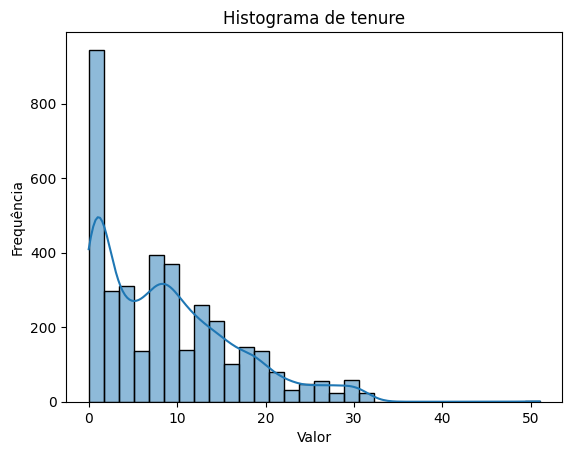

<class 'pandas.core.frame.DataFrame'>
Index: 3774 entries, 0 to 5629
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  3774 non-null   int64  
 1   Tenure                                 3774 non-null   float64
 2   CityTier                               3774 non-null   int64  
 3   WarehouseToHome                        3774 non-null   float64
 4   HourSpendOnApp                         3774 non-null   float64
 5   NumberOfDeviceRegistered               3774 non-null   int64  
 6   SatisfactionScore                      3774 non-null   int64  
 7   NumberOfAddress                        3774 non-null   int64  
 8   Complain                               3774 non-null   int64  
 9   OrderAmountHikeFromlastYear            3774 non-null   float64
 10  CouponUsed                             3774 non-null   float64
 11  OrderCoun

In [152]:



import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Tenure'], bins=30, kde=True)
plt.title('Histograma de tenure')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()
print(df.info())

# como temos histogramas não normalizados, podemos usar a mediana, que é uma medida mais robusta, para preencher os dados vazios.

In [153]:
import numpy as np
import random
import tensorflow as tf
import os

# Fixar seed
SEED = 43
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)



from sklearn.model_selection import train_test_split

# vamos agora separar os dados de treino, teste e validação, fazer a mediana dos valores faltantes com os dados de treino e aplicá-los também
# nos dados de teste e validação, para evitar data leakage.

X = df.drop('Churn', axis=1)
y = df['Churn']

# Primeiro, separamos os dados de treino/validação (80%) e um conjunto de teste (20%).
# O conjunto de teste ficará separado para evitar data leakage na análise exploratória dos dados.
# Faremos a análise exploratória somente no dataframe contendo dados de treino e validação.
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED, stratify=y)


print(f"Formato dos dados de treino/validação: {X_temp.shape}")

print(f"Formato dos dados de teste: {X_test.shape}")

print(f"==========================")
print(f"Distribuição do target de treino/validação: ")
print(y_temp.value_counts())

print(f"==========================")
print(f"Distribuição do target de teste: ")
print(y_test.value_counts())



Formato dos dados de treino/validação: (2641, 34)
Formato dos dados de teste: (1133, 34)
Distribuição do target de treino/validação: 
Churn
0    2199
1     442
Name: count, dtype: int64
Distribuição do target de teste: 
Churn
0    944
1    189
Name: count, dtype: int64


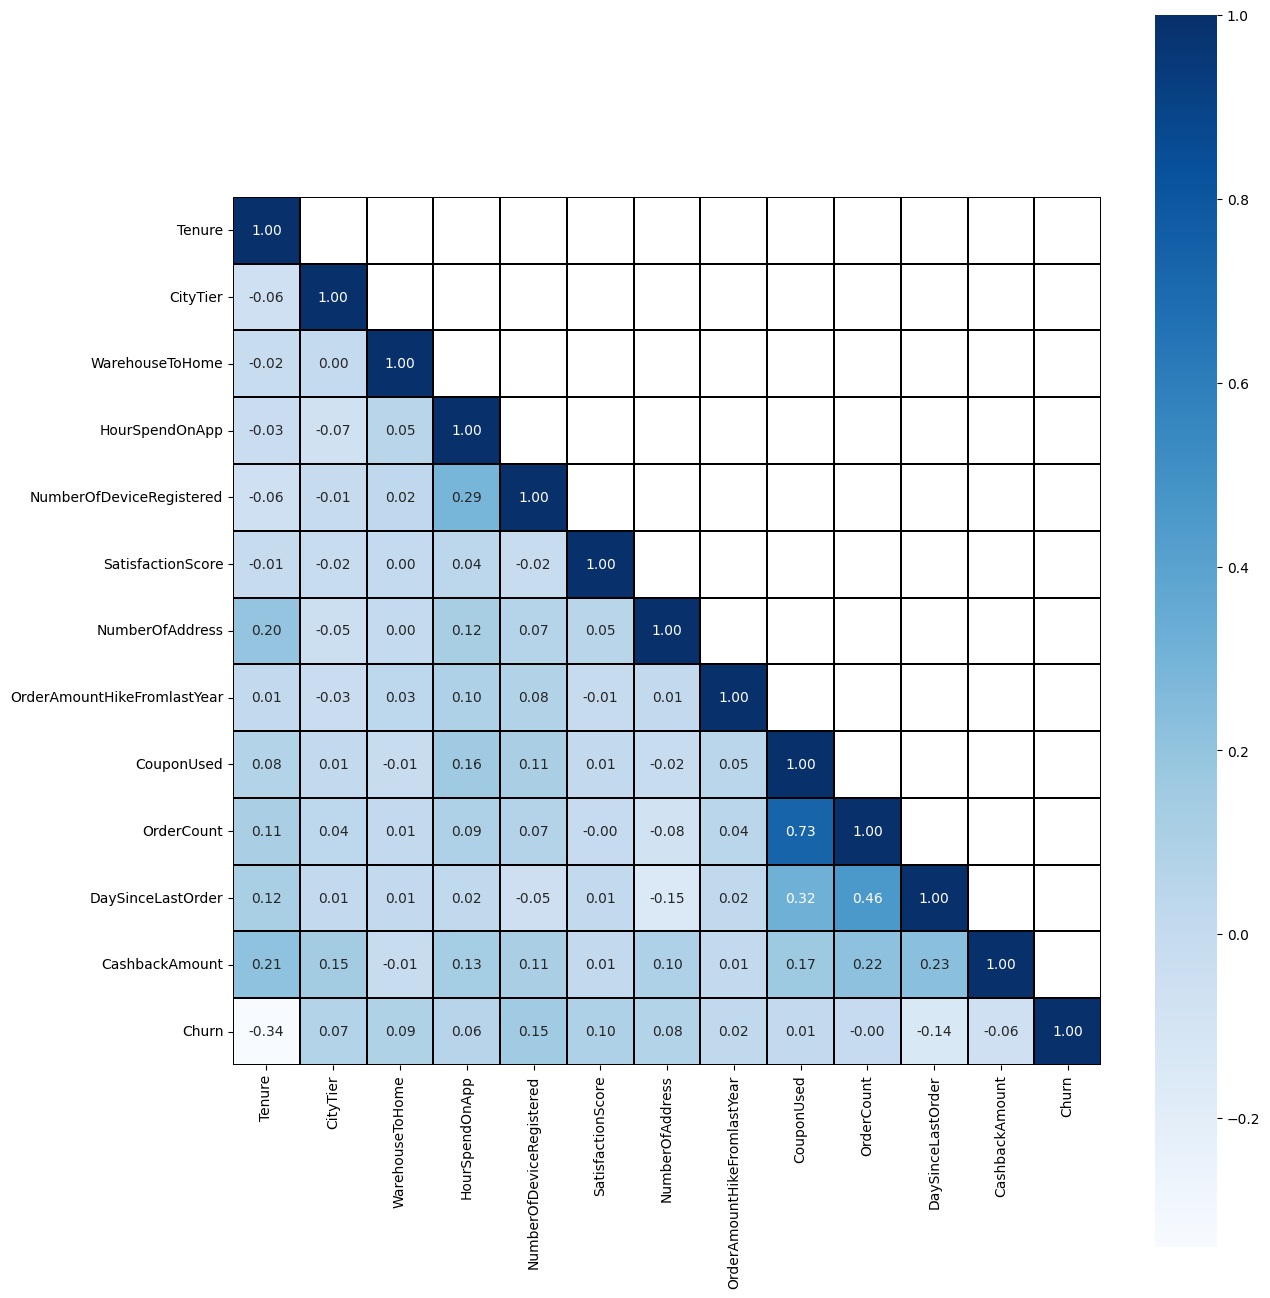

Features numéricas relevantes (pré-multicolinearidade): ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount']


/tmp/ipykernel_9095/2725457537.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_sorted.values, y=correlations_sorted.index, palette='coolwarm')


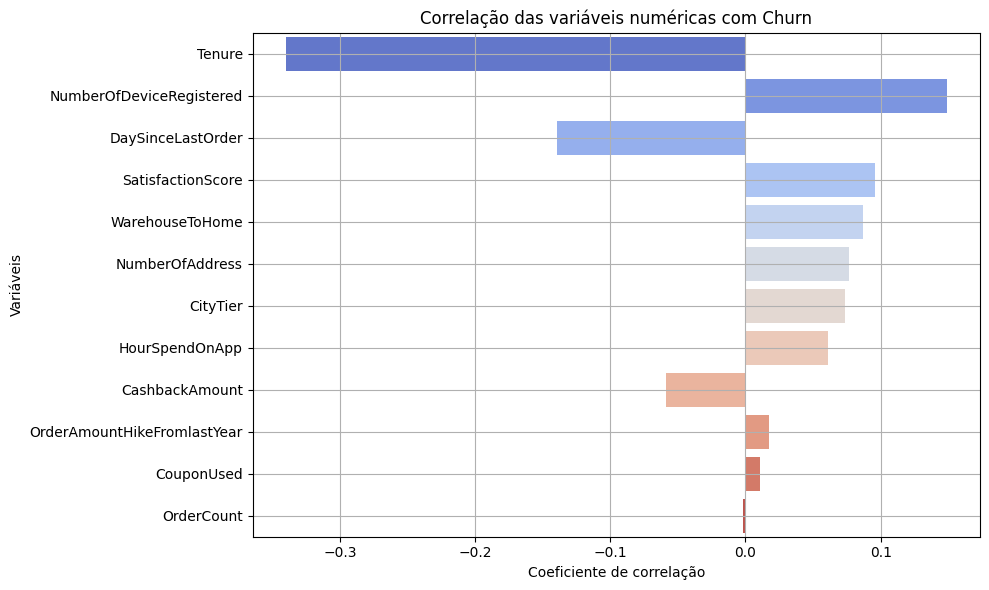

Features removidas por alta correlação: set()
Features numéricas finais: ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount']
Features categóricas relevantes: ['Complain', 'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone', 'MaritalStatus_Single', 'MaritalStatus_Married', 'PreferredLoginDevice_Mobile Phone', 'PreferredPaymentMode_COD', 'PreferredLoginDevice_Phone', 'PreferredPaymentMode_E wallet', 'PreferredLoginDevice_Computer', 'PreferredPaymentMode_Debit Card', 'Gender_Male', 'Gender_Female', 'PreferredPaymentMode_Credit Card']


/tmp/ipykernel_9095/2725457537.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="viridis")


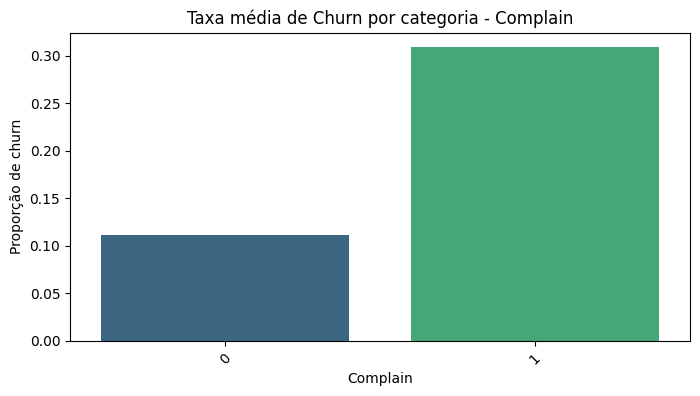

/tmp/ipykernel_9095/2725457537.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="viridis")


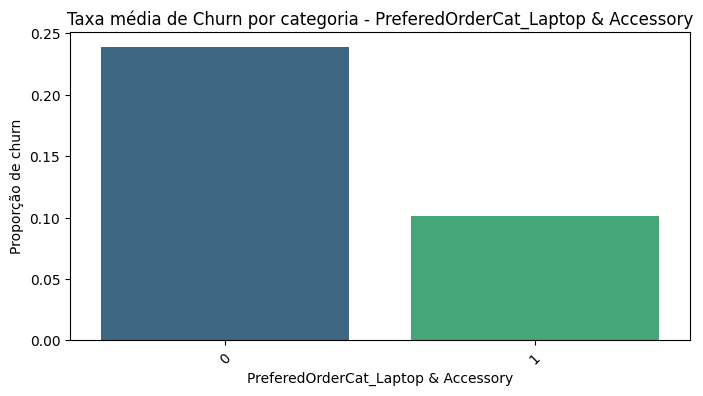

/tmp/ipykernel_9095/2725457537.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="viridis")


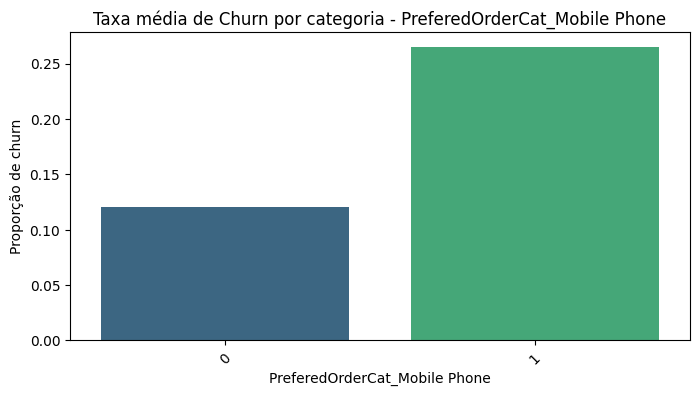

/tmp/ipykernel_9095/2725457537.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="viridis")


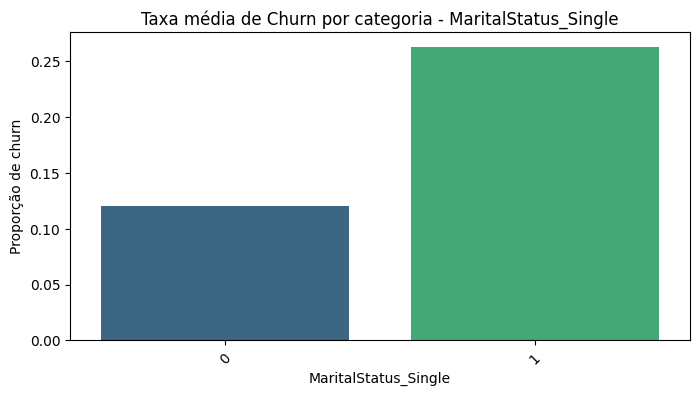

/tmp/ipykernel_9095/2725457537.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="viridis")


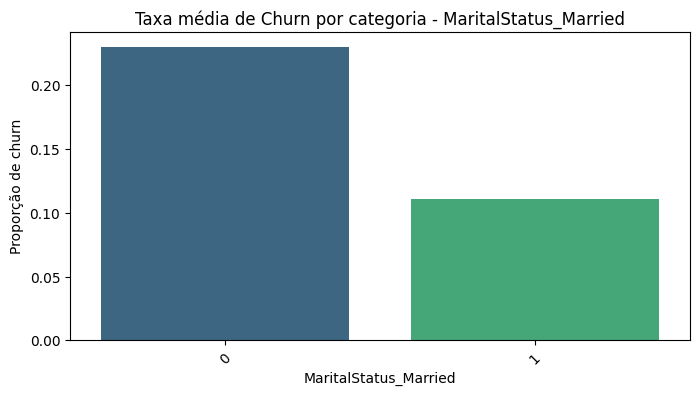

/tmp/ipykernel_9095/2725457537.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="viridis")


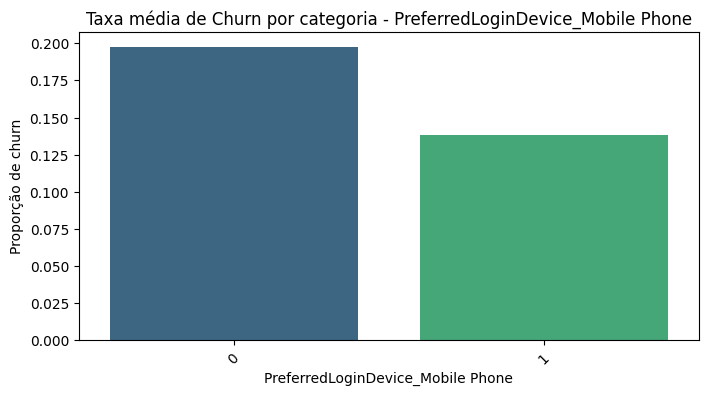

/tmp/ipykernel_9095/2725457537.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="viridis")


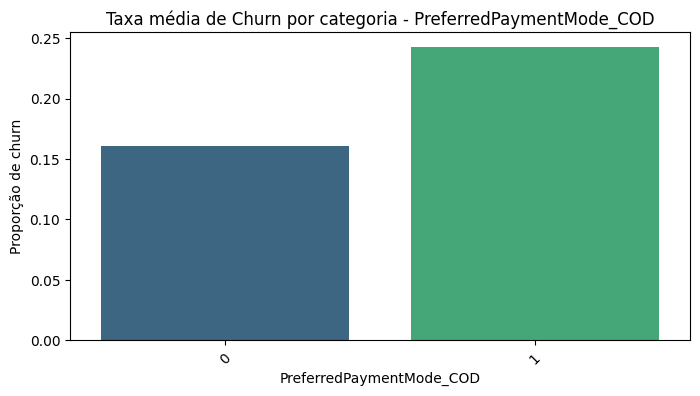

/tmp/ipykernel_9095/2725457537.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="viridis")


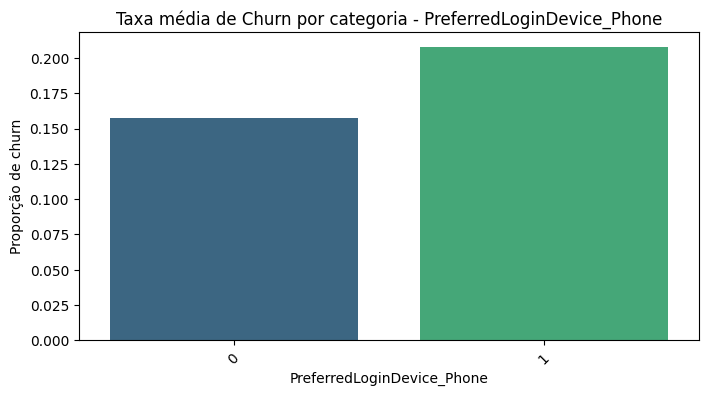

/tmp/ipykernel_9095/2725457537.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="viridis")


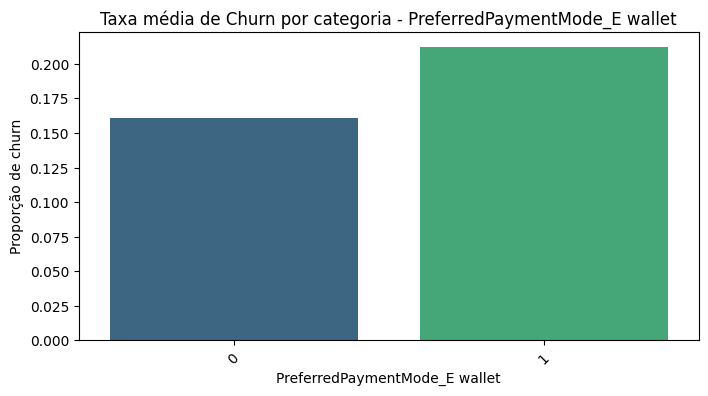

/tmp/ipykernel_9095/2725457537.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="viridis")


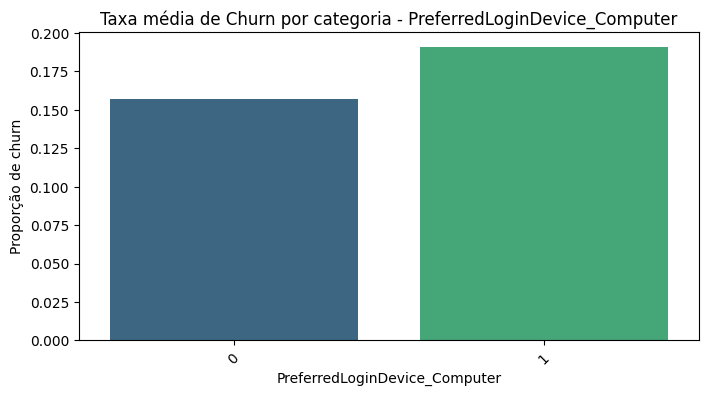

/tmp/ipykernel_9095/2725457537.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="viridis")


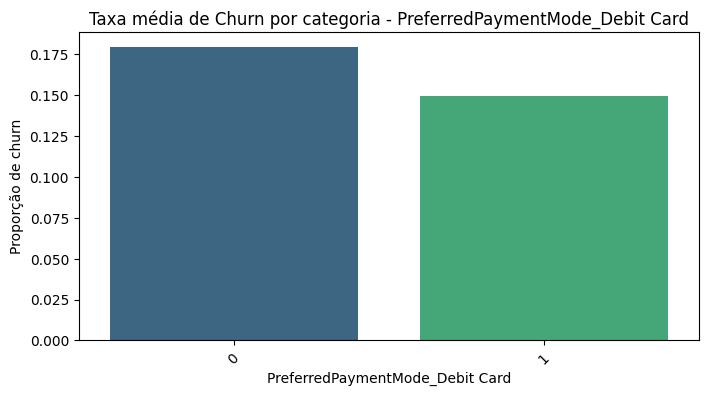

/tmp/ipykernel_9095/2725457537.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="viridis")


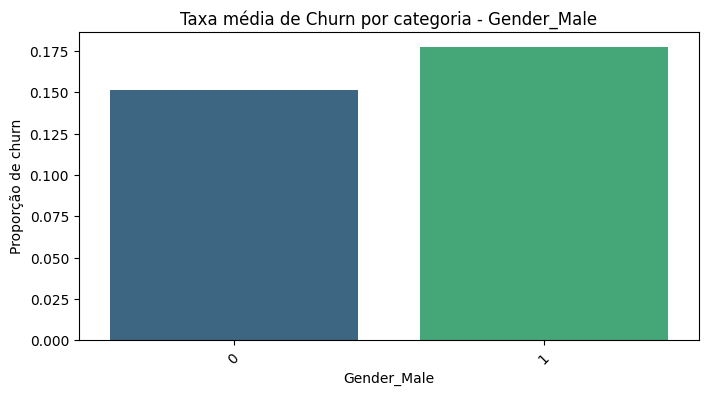

/tmp/ipykernel_9095/2725457537.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="viridis")


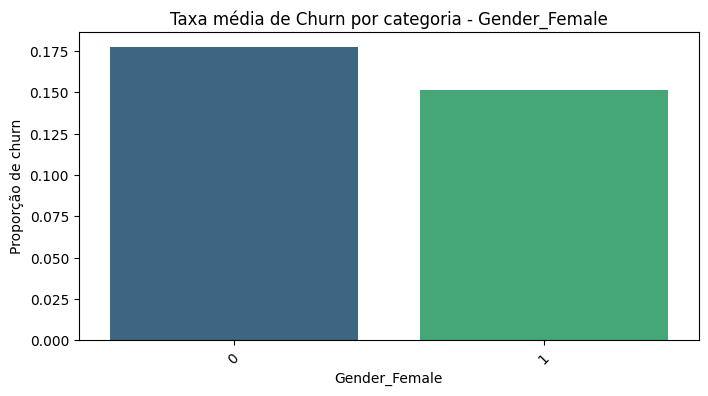

/tmp/ipykernel_9095/2725457537.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="viridis")


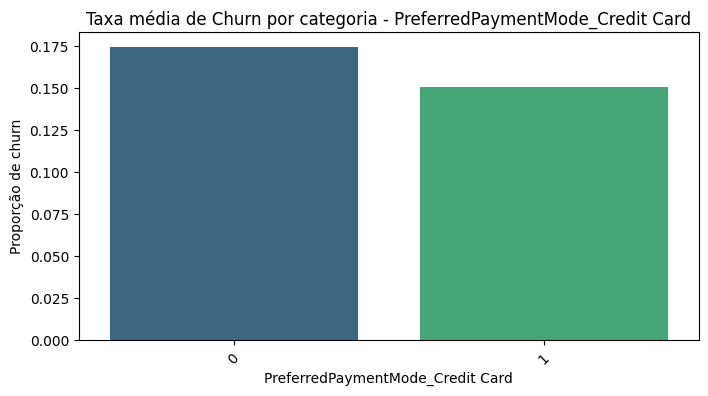


Lista final de features relevantes para o modelo (numéricas + categóricas):
['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount', 'Complain', 'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone', 'MaritalStatus_Single', 'MaritalStatus_Married', 'PreferredLoginDevice_Mobile Phone', 'PreferredPaymentMode_COD', 'PreferredLoginDevice_Phone', 'PreferredPaymentMode_E wallet', 'PreferredLoginDevice_Computer', 'PreferredPaymentMode_Debit Card', 'Gender_Male', 'Gender_Female', 'PreferredPaymentMode_Credit Card']


In [ ]:
# if not isinstance(y_train, pd.Series):
#     y_train = pd.Series(y_train, name='Churn')

df_temp = pd.concat([X_temp, y_temp], axis=1)
df_temp.shape

df_temp.columns

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# ======================
# 1. Definir variáveis numéricas e categóricas
# ======================
colunas_numericas = [
    'Tenure','CityTier','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered',
    'SatisfactionScore','NumberOfAddress','OrderAmountHikeFromlastYear','CouponUsed',
    'OrderCount','DaySinceLastOrder','CashbackAmount'
]

df_numeric = df[colunas_numericas + ['Churn']].copy()
df_categoricas = df.drop(columns=colunas_numericas + ['Churn']).copy()

# ======================
# 2. Variáveis numéricas → Correlação
# ======================

corr_matrix = df_numeric.corr(numeric_only=True)
correlations = corr_matrix['Churn'].drop('Churn')

f, ax = plt.subplots(figsize=(14, 16))
sns.heatmap(
    corr_matrix,
    # mask=np.triu(np.ones(corr_matrix.shape), k=1),  # evita duplicados
    linewidth=0.25,
    cmap="coolwarm",
    linecolor='Black',
    square=True,
    annot=True,  # mostra valores
    fmt=".2f"
)

correlations_sorted = correlations.reindex(correlations.abs().sort_values(ascending=False).index)

# Filtra por limite mínimo de correlação
limite_min_corr = 0.03
features_num_relevantes = correlations[correlations.abs() >= limite_min_corr].index.tolist()

print("Features numéricas relevantes (pré-multicolinearidade):", features_num_relevantes)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations_sorted.values, y=correlations_sorted.index, palette='coolwarm')
plt.title('Correlação das variáveis numéricas com Churn')
plt.xlabel('Coeficiente de correlação')
plt.ylabel('Variáveis')
plt.grid(True)
plt.tight_layout()
plt.show()

# ======================
# 3. Remover multicolinearidade das numéricas
# ======================
df_filtrado = df_numeric[features_num_relevantes]

corr_matrix = df_filtrado.corr().abs()
mask = np.triu(np.ones(corr_matrix.shape), k=1)


colunas_remover = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > 0.9:
            colname = corr_matrix.columns[j]  # remove sempre a segunda do par
            colunas_remover.add(colname)

features_num_final = [f for f in features_num_relevantes if f not in colunas_remover]

print("Features removidas por alta correlação:", colunas_remover)
print("Features numéricas finais:", features_num_final)

# ======================
# 4. Variáveis categóricas → Teste qui-quadrado
# ======================
resultados_categoricas = []
for col in df_categoricas.columns:
    tabela = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, expected = stats.chi2_contingency(tabela)
    resultados_categoricas.append({'feature': col, 'p_valor': p})

resultados_categoricas = pd.DataFrame(resultados_categoricas).sort_values('p_valor')

# Filtra por significância
limite_pvalor = 0.08
features_cat_relevantes = resultados_categoricas[resultados_categoricas['p_valor'] < limite_pvalor]['feature'].tolist()

print("Features categóricas relevantes:", features_cat_relevantes)

# Visualização das taxas de churn por categoria
for col in features_cat_relevantes:
    plt.figure(figsize=(8,4))
    churn_rates = df.groupby(col)['Churn'].mean().sort_values(ascending=False)
    sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="viridis")
    plt.title(f"Taxa média de Churn por categoria - {col}")
    plt.ylabel("Proporção de churn")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()

# ======================
# 5. Juntar numéricas + categóricas
# ======================
features_relevantes = features_num_final + features_cat_relevantes

print("\n=========================")
print("Lista final de features relevantes para o modelo (numéricas + categóricas):")
print(features_relevantes)


In [155]:
print("Features para remover por alta correlação:")
print(colunas_remover)

features_relevantes.remove('Gender_Male')



Features para remover por alta correlação:
set()


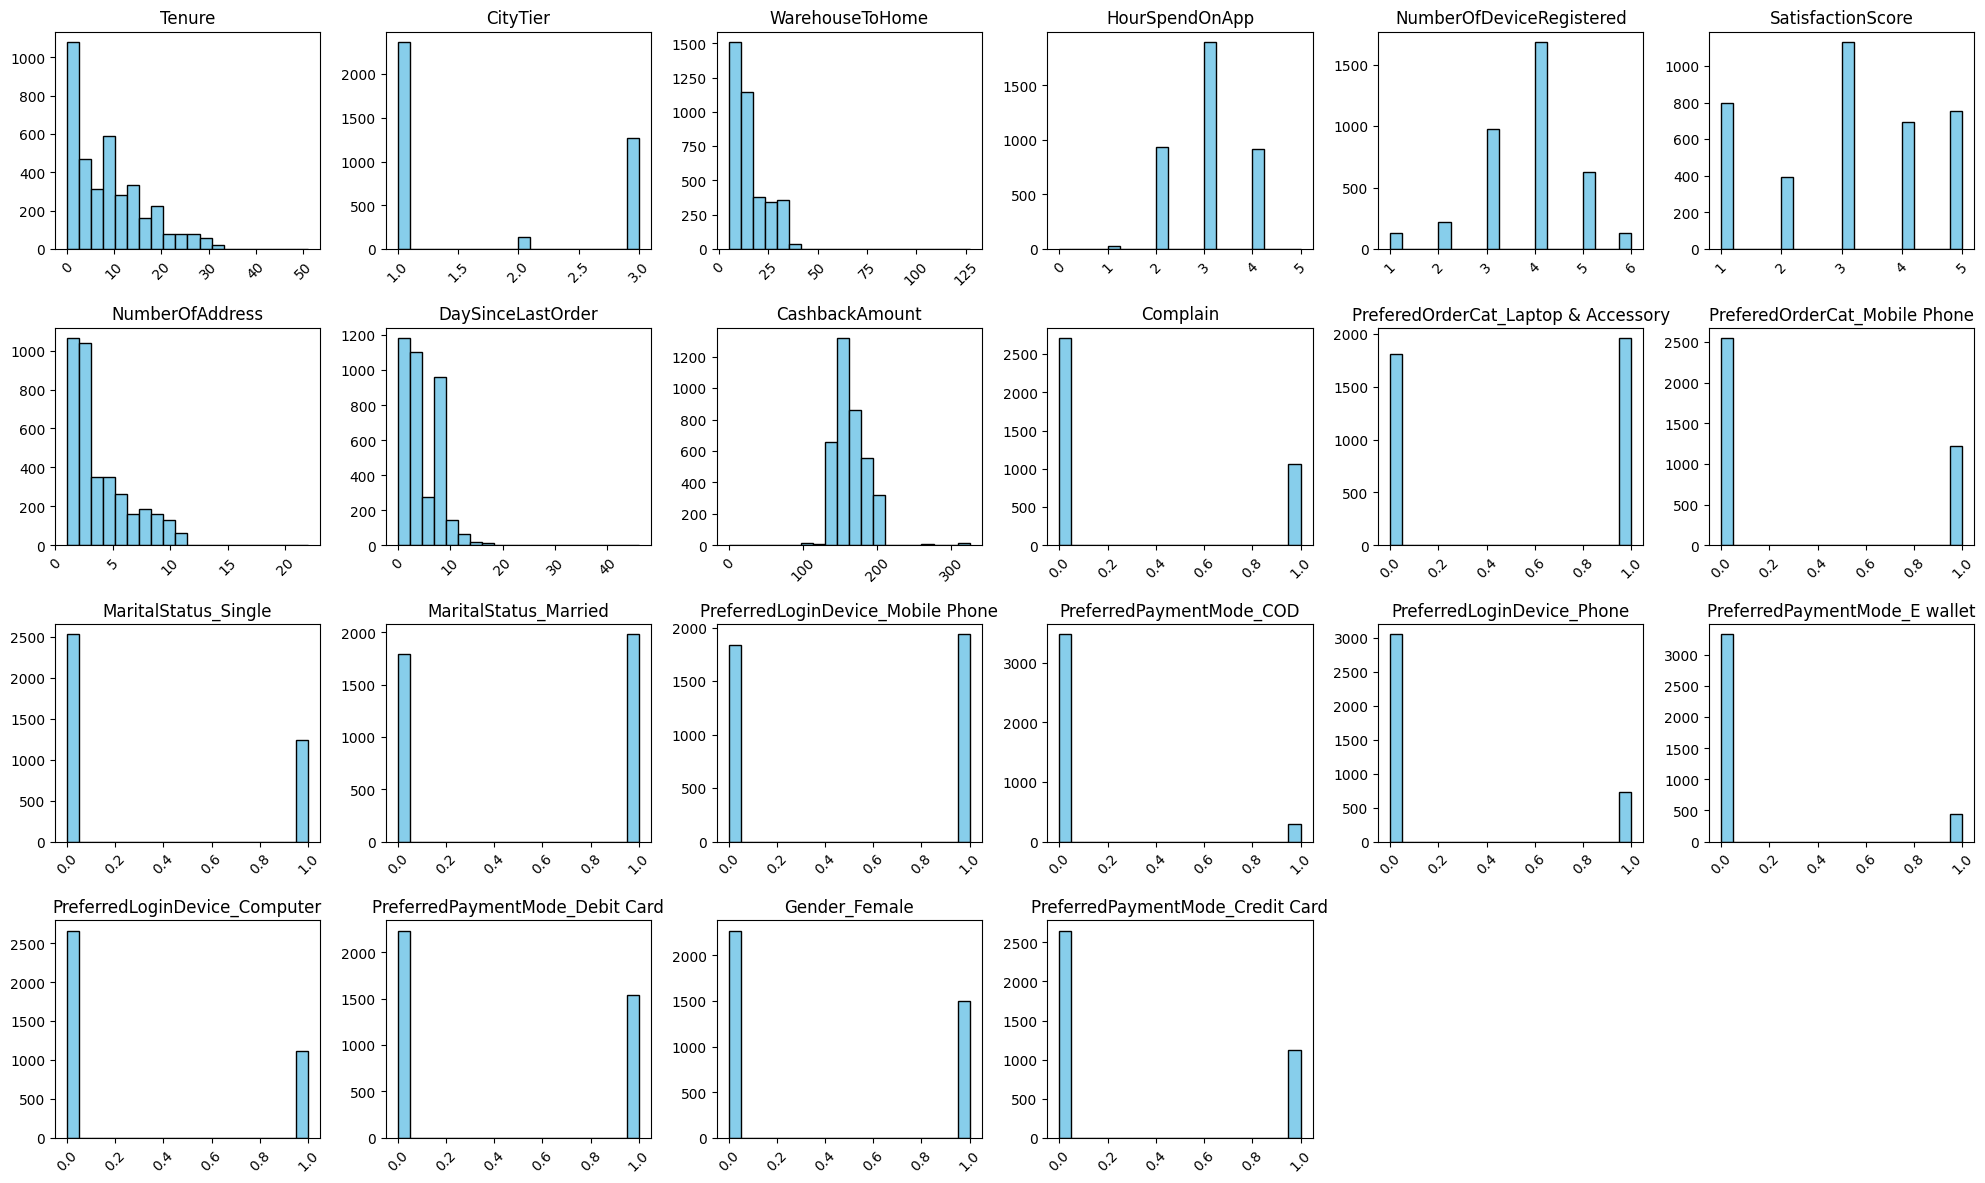

In [156]:
import matplotlib.pyplot as plt
import math

# features_list = X_temp_selected_features.columns[:22].tolist()  # ajuste conforme seu df
n_features = len(features_relevantes)

n_cols = 6
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12))
axes = axes.flatten()

for i, feature in enumerate(features_relevantes):
    axes[i].hist(df[feature].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(feature)
    axes[i].tick_params(axis='x', rotation=45)

# Remove eixos vazios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
# plt.title('Análise da distribuição das features selecionadas - dados de treino e validação')
plt.show()



In [157]:
# #Analise de variancia - remover colunas que em 99% do tempo tenham o mesmo dado

# limite = 0.99  # 99% iguais

# # Calcula a proporção do valor mais frequente por coluna
# proporcoes_maximas = df_sem_multicolinearidade.apply(lambda col: col.value_counts(normalize=True).iloc[0])

# # Filtra colunas onde a proporção máxima é menor que o limite
# colunas_para_manter = proporcoes_maximas[proporcoes_maximas < limite].index

# df_temp_filtrado_variancia = df_sem_multicolinearidade[colunas_para_manter]

# import matplotlib.pyplot as plt

# proporcoes_maximas.sort_values(ascending=False).plot(kind='bar', figsize=(12,5))
# plt.axhline(y=0.99, color='r', linestyle='--')
# plt.ylabel('Proporção do valor mais frequente')
# plt.show()

# # df_temp_filtrado_variancia.columns
# df_sem_multicolinearidade['PreferredPaymentMode_CC'].value_counts(normalize=True)


X_test_selected_features = X_test[features_relevantes]
X_temp_selected_features = X_temp[features_relevantes]
print(features_relevantes)

['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount', 'Complain', 'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone', 'MaritalStatus_Single', 'MaritalStatus_Married', 'PreferredLoginDevice_Mobile Phone', 'PreferredPaymentMode_COD', 'PreferredLoginDevice_Phone', 'PreferredPaymentMode_E wallet', 'PreferredLoginDevice_Computer', 'PreferredPaymentMode_Debit Card', 'Gender_Female', 'PreferredPaymentMode_Credit Card']


In [158]:

print(f"Formato dos dados de treino/validação após seleção das features: {X_temp_selected_features.shape}")
print(f"Formato dos dados de teste após seleção das features: {X_test_selected_features.shape}")

Formato dos dados de treino/validação após seleção das features: (2641, 22)
Formato dos dados de teste após seleção das features: (1133, 22)


In [162]:
#AJUSTAR OS PARAMETROS PARA A ESCOLHA DO MELHOR MODELO USANDO VALIDACAO CRUZADA

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import RobustScaler
import numpy as np
import tensorflow as tf
from keras import layers
from sklearn.utils import class_weight
import pandas as pd

# Número de folds
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Função para construir o modelo
def create_model(input_dim, hidden_layers, dropout_rate, optimizer_name, learning_rate=0.01):
    inputs = tf.keras.Input(shape=(input_dim,))
    x = inputs

    # Criação dinâmica das camadas ocultas
    for units in hidden_layers:
        x = layers.Dense(units, activation='relu')(x)
        if dropout_rate > 0:
            x = layers.Dropout(dropout_rate)(x)

    outputs = layers.Dense(1, activation='sigmoid')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="Churn_Predictor_NN")

    # Escolha do otimizador
    if optimizer_name == "adam":
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_name == "rmsprop":
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError("Optimizer não suportado")

    # Adiciona precisão no compile
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.Recall(name="recall"), tf.keras.metrics.Precision(name="precision")]
    )
    return model

# EarlyStopping
es = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=100,
    min_delta=0.0001,
    restore_best_weights=True
)

# Diferentes configurações para testar
configurations = [
    {"hidden_layers": [10], "dropout": 0.0, "optimizer": "adam"},
    {"hidden_layers": [10], "dropout": 0.1, "optimizer": "adam"},
    {"hidden_layers": [10], "dropout": 0.0, "optimizer": "rmsprop"},
    {"hidden_layers": [10], "dropout": 0.1, "optimizer": "rmsprop"},
    {"hidden_layers": [16, 8], "dropout": 0.0, "optimizer": "adam"},
    {"hidden_layers": [16, 8], "dropout": 0.1, "optimizer": "adam"},
    {"hidden_layers": [16, 8], "dropout": 0.0, "optimizer": "rmsprop"},
    {"hidden_layers": [16, 8], "dropout": 0.1, "optimizer": "rmsprop"},
    {"hidden_layers": [20, 10], "dropout": 0.0, "optimizer": "adam"},
    {"hidden_layers": [20, 10], "dropout": 0.1, "optimizer": "adam"},
    {"hidden_layers": [20, 10], "dropout": 0.0, "optimizer": "rmsprop"},
    {"hidden_layers": [20, 10], "dropout": 0.1, "optimizer": "rmsprop"},
    {"hidden_layers": [32, 16], "dropout": 0.0, "optimizer": "adam"},
    {"hidden_layers": [32, 16], "dropout": 0.1, "optimizer": "adam"},    
    {"hidden_layers": [32, 16], "dropout": 0.0, "optimizer": "rmsprop"},
    {"hidden_layers": [32, 16], "dropout": 0.1, "optimizer": "rmsprop"},
    {"hidden_layers": [64, 32], "dropout": 0.1, "optimizer": "adam"},
]

results = []

# Loop pelas configurações
for config in configurations:
    print(f"\n===== Testando configuração: {config} =====")
    scores = []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X_temp_selected_features, y_temp)):
        print(f"\n--- Fold {fold+1}/{n_splits} ---")

        # Divisão dos dados
        X_train_fold, X_val_fold = X_temp_selected_features.iloc[train_idx], X_temp_selected_features.iloc[val_idx]
        y_train_fold, y_val_fold = y_temp.iloc[train_idx], y_temp.iloc[val_idx]

        # Escalonamento SEM vazamento
        scaler = RobustScaler()
        X_train_scaled = scaler.fit_transform(X_train_fold)
        X_val_scaled = scaler.transform(X_val_fold)

        # Class weights
        cw = class_weight.compute_class_weight(
            'balanced',
            classes=np.unique(y_train_fold),
            y=y_train_fold
        )
        cw = {i: cw[i] for i in range(len(cw))}

        # Criar modelo
        model = create_model(
            input_dim=X_train_scaled.shape[1],
            hidden_layers=config["hidden_layers"],
            dropout_rate=config["dropout"],
            optimizer_name=config["optimizer"],
            learning_rate=0.01
        )

        # Treinar
        model.fit(
            X_train_scaled, y_train_fold,
            validation_data=(X_val_scaled, y_val_fold),
            epochs=800,
            batch_size=X_train_scaled.shape[0],
            class_weight=cw,
            verbose=0,
            callbacks=[es]
        )

        # Avaliação
        score = model.evaluate(X_val_scaled, y_val_fold, verbose=0)  
        # score = [loss, accuracy, recall, precision]
        scores.append(score)

    scores = np.array(scores)
    mean_loss, mean_acc, mean_recall, mean_precision = scores[:,0].mean(), scores[:,1].mean(), scores[:,2].mean(), scores[:,3].mean()
    mean_f1 = 2 * (mean_precision * mean_recall) / (mean_precision + mean_recall + 1e-7)

    results.append({
        "hidden_layers": config["hidden_layers"],
        "dropout": config["dropout"],
        "optimizer": config["optimizer"],
        "loss": mean_loss,
        "accuracy": mean_acc,
        "recall": mean_recall,
        "precision": mean_precision,
        "f1_score": mean_f1
    })

# Resultados em DataFrame
results_df = pd.DataFrame(results)
print("\n===== Resultados finais =====")
print(results_df)
results_df.to_csv("resultados_modelos.csv", index=False)



===== Testando configuração: {'hidden_layers': [10], 'dropout': 0.0, 'optimizer': 'adam'} =====

--- Fold 1/5 ---


2025-08-26 12:30:30.973937: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-08-26 12:31:09.674926: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),


--- Fold 2/5 ---


2025-08-26 12:32:07.549549: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 3/5 ---


2025-08-26 12:32:33.185256: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 4/5 ---


2025-08-26 12:33:15.678041: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 5/5 ---


2025-08-26 12:33:51.103715: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



===== Testando configuração: {'hidden_layers': [10], 'dropout': 0.1, 'optimizer': 'adam'} =====

--- Fold 1/5 ---


2025-08-26 12:34:39.784125: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 2/5 ---


2025-08-26 12:35:36.768104: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 3/5 ---


2025-08-26 12:36:54.570372: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 4/5 ---


2025-08-26 12:37:32.243613: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 5/5 ---


2025-08-26 12:38:19.971268: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



===== Testando configuração: {'hidden_layers': [10], 'dropout': 0.0, 'optimizer': 'rmsprop'} =====

--- Fold 1/5 ---


2025-08-26 12:39:23.776374: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 2/5 ---


2025-08-26 12:40:38.870228: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 3/5 ---


2025-08-26 12:41:36.799214: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 4/5 ---


2025-08-26 12:42:12.981349: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 5/5 ---


2025-08-26 12:42:52.212284: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



===== Testando configuração: {'hidden_layers': [10], 'dropout': 0.1, 'optimizer': 'rmsprop'} =====

--- Fold 1/5 ---


2025-08-26 12:43:44.559817: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 2/5 ---


2025-08-26 12:44:58.265431: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 3/5 ---


2025-08-26 12:45:37.508168: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 4/5 ---


2025-08-26 12:46:18.766403: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 5/5 ---


2025-08-26 12:46:50.974735: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



===== Testando configuração: {'hidden_layers': [16, 8], 'dropout': 0.0, 'optimizer': 'adam'} =====

--- Fold 1/5 ---


2025-08-26 12:47:16.242049: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 2/5 ---


2025-08-26 12:47:37.035260: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 3/5 ---


2025-08-26 12:47:59.690253: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 4/5 ---


2025-08-26 12:48:15.800225: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 5/5 ---


2025-08-26 12:48:39.429412: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



===== Testando configuração: {'hidden_layers': [16, 8], 'dropout': 0.1, 'optimizer': 'adam'} =====

--- Fold 1/5 ---


2025-08-26 12:49:17.204484: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 2/5 ---


2025-08-26 12:49:49.281922: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 3/5 ---


2025-08-26 12:50:12.410630: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 4/5 ---


2025-08-26 12:50:51.165964: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 5/5 ---


2025-08-26 12:51:30.071164: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



===== Testando configuração: {'hidden_layers': [16, 8], 'dropout': 0.0, 'optimizer': 'rmsprop'} =====

--- Fold 1/5 ---


2025-08-26 12:52:08.642856: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 2/5 ---


2025-08-26 12:52:48.112230: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 3/5 ---


2025-08-26 12:53:16.417660: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 4/5 ---


2025-08-26 12:54:06.263200: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 5/5 ---


2025-08-26 12:54:53.846107: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



===== Testando configuração: {'hidden_layers': [16, 8], 'dropout': 0.1, 'optimizer': 'rmsprop'} =====

--- Fold 1/5 ---


2025-08-26 12:55:25.460410: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 2/5 ---


2025-08-26 12:55:58.871698: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 3/5 ---


2025-08-26 12:56:19.540102: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 4/5 ---


2025-08-26 12:57:04.475907: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 5/5 ---


2025-08-26 12:57:34.118591: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



===== Testando configuração: {'hidden_layers': [20, 10], 'dropout': 0.0, 'optimizer': 'adam'} =====

--- Fold 1/5 ---


2025-08-26 12:57:59.571391: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 2/5 ---


2025-08-26 12:58:18.883382: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 3/5 ---


2025-08-26 12:58:39.890274: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 4/5 ---


2025-08-26 12:58:58.009566: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 5/5 ---


2025-08-26 12:59:19.896153: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



===== Testando configuração: {'hidden_layers': [20, 10], 'dropout': 0.1, 'optimizer': 'adam'} =====

--- Fold 1/5 ---


2025-08-26 12:59:56.516517: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 2/5 ---


2025-08-26 13:00:50.794365: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 3/5 ---


2025-08-26 13:01:12.111928: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 4/5 ---


2025-08-26 13:01:52.754930: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 5/5 ---


2025-08-26 13:02:24.885870: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



===== Testando configuração: {'hidden_layers': [20, 10], 'dropout': 0.0, 'optimizer': 'rmsprop'} =====

--- Fold 1/5 ---


2025-08-26 13:02:58.994331: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 2/5 ---


2025-08-26 13:03:23.549264: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 3/5 ---


2025-08-26 13:03:57.113335: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 4/5 ---


2025-08-26 13:04:23.004409: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 5/5 ---


2025-08-26 13:04:58.080066: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



===== Testando configuração: {'hidden_layers': [20, 10], 'dropout': 0.1, 'optimizer': 'rmsprop'} =====

--- Fold 1/5 ---


2025-08-26 13:05:43.746071: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 2/5 ---


2025-08-26 13:06:10.213229: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 3/5 ---


2025-08-26 13:06:34.696705: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 4/5 ---


2025-08-26 13:07:16.511118: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 5/5 ---


2025-08-26 13:08:29.185180: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



===== Testando configuração: {'hidden_layers': [32, 16], 'dropout': 0.0, 'optimizer': 'adam'} =====

--- Fold 1/5 ---


2025-08-26 13:08:50.085961: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 2/5 ---


2025-08-26 13:09:06.925841: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 3/5 ---


2025-08-26 13:09:25.363508: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 4/5 ---


2025-08-26 13:09:45.517574: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 5/5 ---


2025-08-26 13:10:05.046631: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



===== Testando configuração: {'hidden_layers': [32, 16], 'dropout': 0.1, 'optimizer': 'adam'} =====

--- Fold 1/5 ---


2025-08-26 13:10:32.210585: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 2/5 ---


2025-08-26 13:10:52.939242: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 3/5 ---


2025-08-26 13:11:12.682899: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 4/5 ---


2025-08-26 13:11:42.877969: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 5/5 ---


2025-08-26 13:12:44.789766: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



===== Testando configuração: {'hidden_layers': [32, 16], 'dropout': 0.0, 'optimizer': 'rmsprop'} =====

--- Fold 1/5 ---


2025-08-26 13:13:12.807834: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 2/5 ---


2025-08-26 13:13:49.819884: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 3/5 ---


2025-08-26 13:14:09.243099: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 4/5 ---


2025-08-26 13:14:47.166226: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 5/5 ---


2025-08-26 13:15:37.236355: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



===== Testando configuração: {'hidden_layers': [32, 16], 'dropout': 0.1, 'optimizer': 'rmsprop'} =====

--- Fold 1/5 ---


2025-08-26 13:16:15.416882: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 2/5 ---


2025-08-26 13:16:54.671200: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 3/5 ---


2025-08-26 13:17:11.137459: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 4/5 ---


2025-08-26 13:17:46.680269: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 5/5 ---


2025-08-26 13:18:49.294279: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



===== Testando configuração: {'hidden_layers': [64, 32], 'dropout': 0.1, 'optimizer': 'adam'} =====

--- Fold 1/5 ---


2025-08-26 13:19:06.683937: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 2/5 ---


2025-08-26 13:19:25.826957: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 3/5 ---


2025-08-26 13:19:41.765378: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 4/5 ---


2025-08-26 13:20:05.992503: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



--- Fold 5/5 ---

===== Resultados finais =====
   hidden_layers  dropout optimizer      loss  accuracy    recall  precision  \
0           [10]      0.0      adam  0.330931  0.860285  0.812130   0.559420   
1           [10]      0.1      adam  0.304318  0.879587  0.832610   0.602723   
2           [10]      0.0   rmsprop  0.307017  0.872395  0.794050   0.588653   
3           [10]      0.1   rmsprop  0.276190  0.892086  0.766854   0.650897   
4        [16, 8]      0.0      adam  0.287438  0.895104  0.800638   0.653253   
5        [16, 8]      0.1      adam  0.272264  0.898524  0.848315   0.658995   
6        [16, 8]      0.0   rmsprop  0.270337  0.892845  0.739760   0.662792   
7        [16, 8]      0.1   rmsprop  0.251968  0.903825  0.805490   0.680131   
8       [20, 10]      0.0      adam  0.308682  0.890941  0.798544   0.639863   
9       [20, 10]      0.1      adam  0.248578  0.915186  0.875434   0.698809   
10      [20, 10]      0.0   rmsprop  0.236085  0.910257  0.746476   0.7

2025-08-26 13:20:28.020076: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


In [169]:
results_df.to_csv("resultados_modelos.csv", index=False)

In [170]:
results_df

,hidden_layers,dropout,optimizer,loss,accuracy,recall,precision,f1_score
0,[10],0.0,adam,0.330931,0.860285,0.812130,0.559420,0.662494
1,[10],0.1,adam,0.304318,0.879587,0.832610,0.602723,0.699257
2,[10],0.0,rmsprop,0.307017,0.872395,0.794050,0.588653,0.676096
3,[10],0.1,rmsprop,0.276190,0.892086,0.766854,0.650897,0.704134
4,"[16, 8]",0.0,adam,0.287438,0.895104,0.800638,0.653253,0.719475
5,"[16, 8]",0.1,adam,0.272264,0.898524,0.848315,0.658995,0.741765
6,"[16, 8]",0.0,rmsprop,0.270337,0.892845,0.739760,0.662792,0.699164
7,"[16, 8]",0.1,rmsprop,0.251968,0.903825,0.805490,0.680131,0.737521
8,"[20, 10]",0.0,adam,0.308682,0.890941,0.798544,0.639863,0.710451
9,"[20, 10]",0.1,adam,0.248578,0.915186,0.875434,0.698809,0.777213


In [171]:
# APÓS ESCOLHER AS MELHORES CONFIGURAÇÕES PARA O TREINAMENTO DO MELHOR MODELO NA ETAPA ANTERIOR, VAMOS TREINAR O MODELO COM TODOS OS DADOS DE X_TEMP:

# Escalonamento em TODOS os dados de treino (X_temp)
scaler_final = RobustScaler()
X_temp_scaled = scaler_final.fit_transform(X_temp_selected_features)

# Recalcula os pesos de classe
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_temp),
    y=y_temp
)
class_weights = {i: class_weights[i] for i in range(len(class_weights))}

# Cria o modelo do zero

model_final = create_model(
            input_dim=X_temp_scaled.shape[1],
            hidden_layers=[32,16],
            dropout_rate=0.1,
            optimizer_name="adam",
            learning_rate=0.01
)


# EarlyStopping (opcional no treino final, mas pode manter)
es = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",   
    patience=100,
    min_delta=0.0001,
    restore_best_weights=True
)

# Treina no conjunto todo
history_final = model_final.fit(
    X_temp_scaled, y_temp,
    epochs=800,
    validation_split=0.1,
    batch_size=X_temp_scaled.shape[0],
    class_weight=class_weights,
    verbose=1,
    callbacks=[es],
)

# Agora você tem o modelo final treinado




Epoch 1/800


2025-08-26 14:34:50.125629: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_16}}


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7407 - loss: 0.7015 - precision: 0.1940 - recall: 0.1811 - val_accuracy: 0.5698 - val_loss: 0.6720 - val_precision: 0.2808 - val_recall: 0.8200
Epoch 2/800
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.5850 - loss: 0.6608 - precision: 0.2339 - recall: 0.6658 - val_accuracy: 0.4604 - val_loss: 0.6987 - val_precision: 0.2565 - val_recall: 0.9800
Epoch 3/800
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.4937 - loss: 0.6381 - precision: 0.2280 - recall: 0.8673 - val_accuracy: 0.4792 - val_loss: 0.7024 - val_precision: 0.2634 - val_recall: 0.9800
Epoch 4/800
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.5080 - loss: 0.6131 - precision: 0.2384 - recall: 0.9031 - val_accuracy: 0.5283 - val_loss: 0.6832 - val_precision: 0.2781 - val_recall: 0.9400
Epoch 5/800
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.5522 - loss: 0.5959 - precision: 0.2540 - recall: 0.8852 - val_accuracy: 0.6038 - val_loss: 0.6450 - val_precision: 0

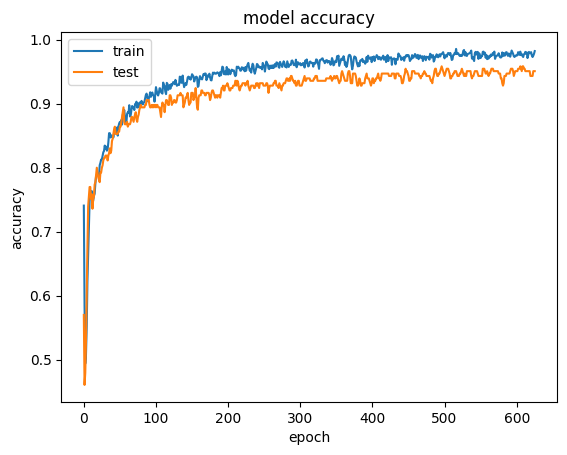

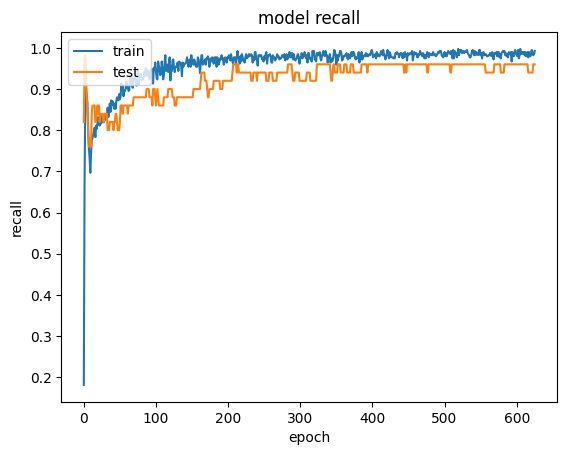

In [172]:

plt.plot(history_final.history['accuracy']) 
plt.plot(history_final.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()


plt.plot(history_final.history['recall']) 
plt.plot(history_final.history['val_recall']) 
plt.title('model recall') 
plt.ylabel('recall')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()


In [175]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

# Fazendo previsões no conjunto de teste
X_test_scaled = scaler_final.transform(X_test_selected_features)
y_pred_proba_nn = model_final.predict(X_test_scaled)
y_pred_nn_padrao = (y_pred_proba_nn > 0.5).astype(int) # Convertendo probabilidades em classes (0 ou 1). 
# Como a sensibilidade para os clientes propensos ao cancelamento é importante, podemos colocar o limiar um pouco abaixo de 0.5 se preferirmos.

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred_nn_padrao)
precision = precision_score(y_test, y_pred_nn_padrao)
recall = recall_score(y_test, y_pred_nn_padrao)

print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Relatório de classificação completo
print("\nRelatório de Classificação Inicial - Redes Neurais:")
print(classification_report(y_test, y_pred_nn_padrao))

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Acurácia: 0.9435
Precisão: 0.7990
Recall: 0.8836

Relatório de Classificação Inicial - Redes Neurais:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       944
           1       0.80      0.88      0.84       189

    accuracy                           0.94      1133
   macro avg       0.89      0.92      0.90      1133
weighted avg       0.95      0.94      0.94      1133



2025-08-26 14:37:52.613325: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


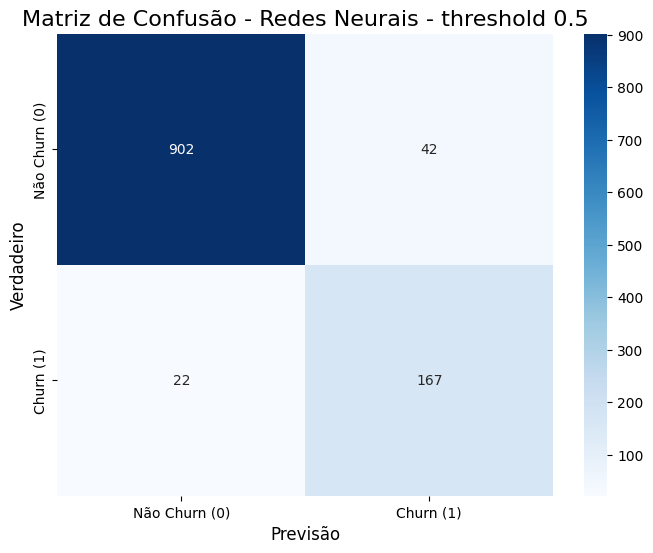

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 1. Calcular a Matriz de Confusão
cm_nn = confusion_matrix(y_test, y_pred_nn_padrao)

# 2. Criar o Gráfico (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Churn (0)', 'Churn (1)'],
            yticklabels=['Não Churn (0)', 'Churn (1)'])

# Adicionar títulos e rótulos para clareza
plt.title('Matriz de Confusão - Redes Neurais - threshold 0.5', fontsize=16)
plt.ylabel('Verdadeiro', fontsize=12)
plt.xlabel('Previsão', fontsize=12)
plt.show()

In [ ]:
# Comparar com árvore de decisão
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import numpy as np

# Hiperparâmetros para testar
min_samples_split_list = [2, 5, 10]
max_depth_list = [None, 5, 10, 20]

# Número de folds
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=SEED)

# Variáveis para armazenar o melhor modelo e pontuação
melhor_modelo_dt = None
melhor_score_dt = 0
melhores_parametros_dt = {}

# Loop pelos hiperparâmetros
for min_split in min_samples_split_list:
    for max_d in max_depth_list:
        f1_scores_fold = []

        # Validação cruzada
        for train_idx, val_idx in skf.split(X_temp_selected_features, y_temp):
            X_train_fold, X_val_fold = X_temp_selected_features.iloc[train_idx], X_temp_selected_features.iloc[val_idx]
            y_train_fold, y_val_fold = y_temp.iloc[train_idx], y_temp.iloc[val_idx]

            # Escalonamento SEM vazamento
            scaler = RobustScaler()
            X_train_scaled = scaler.fit_transform(X_train_fold)
            X_val_scaled = scaler.transform(X_val_fold)

            modelo_dt = DecisionTreeClassifier(min_samples_split=min_split, max_depth=max_d, random_state=SEED)
            modelo_dt.fit(X_train_scaled, y_train_fold)

            y_pred_val_dt = modelo_dt.predict(X_val_scaled)
            f1_fold = f1_score(y_val_fold, y_pred_val_dt, average='binary')
            f1_scores_fold.append(f1_fold)

        # Calcula o f1 médio da configuração
        f1_medio = np.mean(f1_scores_fold)

        # Atualiza o melhor modelo se necessário
        if f1_medio > melhor_score_dt:
            melhor_score_dt = f1_medio
            melhor_modelo_dt = modelo_dt  # modelo da última fold, serve como referência
            melhores_parametros_dt = {
                'min_samples_split': min_split,
                'max_depth': max_d
            }

print("Melhores parâmetros encontrados - Decision Tree:", melhores_parametros_dt)
print("F1 médio (validação cruzada):", melhor_score_dt)




Melhores parâmetros encontrados - Decision Tree: {'min_samples_split': 2, 'max_depth': None}
F1 médio (validação cruzada): 0.7534472208317948


In [200]:
# ==========================
# Treinamento final do modelo de Decision Tree com todos os dados de X_temp
# ==========================

# Escalonamento em todos os dados de treino
scaler_final_dt = RobustScaler()
X_temp_scaled_final = scaler_final_dt.fit_transform(X_temp_selected_features)

# Cria o modelo com os melhores hiperparâmetros encontrados
modelo_dt_final = DecisionTreeClassifier(
    min_samples_split=melhores_parametros_dt['min_samples_split'],
    max_depth=melhores_parametros_dt['max_depth'],
    random_state=SEED
)

# Treina no conjunto todo
modelo_dt_final.fit(X_temp_scaled_final, y_temp)

# Inferência nos dados de teste
X_test_scaled_final = scaler_final_dt.transform(X_test_selected_features)
y_pred_test_dt = modelo_dt_final.predict(X_test_scaled_final)
y_pred_proba_dt = modelo_dt_final.predict_proba(X_test_scaled_final)[:, 1]

print("Modelo final de Decision Tree treinado com todos os dados de X_temp.")


Modelo final de Decision Tree treinado com todos os dados de X_temp.


In [201]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Avaliação do modelo nos dados de teste
print("Accuracy:", accuracy_score(y_test, y_pred_test_dt))
print("Precision:", precision_score(y_test, y_pred_test_dt, average='binary'))
print("Recall:", recall_score(y_test, y_pred_test_dt, average='binary'))

# Relatório de classificação completo
print("\nRelatório de Classificação Inicial - Árvore de Decisão:")
print(classification_report(y_test, y_pred_test_dt))

Accuracy: 0.9435127978817299
Precision: 0.8140703517587939
Recall: 0.8571428571428571

Relatório de Classificação Inicial - Árvore de Decisão:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       944
           1       0.81      0.86      0.84       189

    accuracy                           0.94      1133
   macro avg       0.89      0.91      0.90      1133
weighted avg       0.94      0.94      0.94      1133



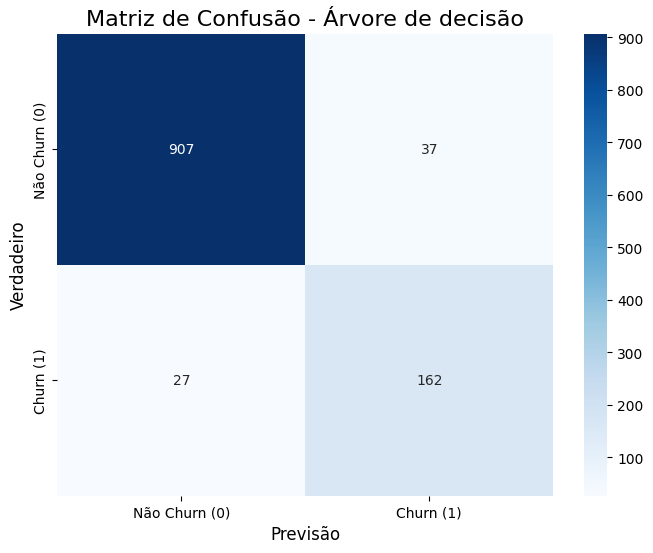

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 1. Calcular a Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_test_dt)

# 2. Criar o Gráfico (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Churn (0)', 'Churn (1)'],
            yticklabels=['Não Churn (0)', 'Churn (1)'])

# Adicionar títulos e rótulos para clareza
plt.title('Matriz de Confusão - Árvore de decisão', fontsize=16)
plt.ylabel('Verdadeiro', fontsize=12)
plt.xlabel('Previsão', fontsize=12)
plt.show()

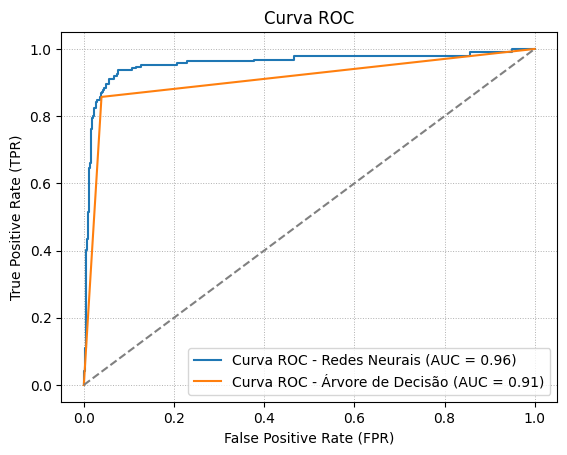

In [203]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calcular a ROC curve
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_proba_nn)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt)

# Calcular a área sob a curva (AUC)
roc_auc_nn = roc_auc_score(y_test, y_pred_proba_nn)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

# Plotar a curva
plt.figure()
plt.plot(fpr_nn, tpr_nn, label=f'Curva ROC - Redes Neurais (AUC = {roc_auc_nn:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Curva ROC - Árvore de Decisão (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Linha aleatória (baseline)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True, linestyle=':', linewidth=0.7)
plt.show()



In [ ]:
# # Calcula distância de cada ponto (fpr_nn, tpr_nn) até (0, 1)
# distancias = np.sqrt((fpr_nn - 0)**2 + (tpr_nn - 1)**2)

# # Índice do menor valor
# idx_melhor = np.argmin(distancias)

# # Threshold ótimo
# threshold_otimo_nn = thresholds_nn[idx_melhor]

# print(f"Threshold ótimo (Rede Neural): {threshold_otimo_nn:.4f}")
# print(f"FPR: {fpr_nn[idx_melhor]:.4f}, TPR: {tpr_nn[idx_melhor]:.4f}")

In [182]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Supondo que você já tenha fpr_nn, tpr_nn, thresholds_nn, threshold_otimo_nn, idx_melhor calculados

# plt.figure(figsize=(8, 6))

# # Curva ROC da rede neural
# plt.plot(fpr_nn, tpr_nn, label='Curva ROC - Rede Neural')

# # Ponto ótimo
# # plt.scatter(fpr_nn[idx_melhor], tpr_nn[idx_melhor], color='red', s=100, label='Ponto ótimo')

# # Linha reta do ponto (0,1) até o ponto ótimo
# # plt.plot([0, fpr_nn[idx_melhor]], [1, tpr_nn[idx_melhor]], color='red', linestyle='--', label='Distância até (0,1)')

# # Linha diagonal baseline (aleatória)
# plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# plt.xlabel('False Positive Rate (FPR)')
# plt.ylabel('True Positive Rate (TPR)')
# plt.title('Curva ROC - Rede Neural')
# plt.legend(loc='lower right')
# plt.grid(True, linestyle=':', linewidth=0.7)
# plt.show()

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


2025-08-26 15:01:35.940815: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Melhor threshold: 0.590
Índice de Youden máximo: 0.988


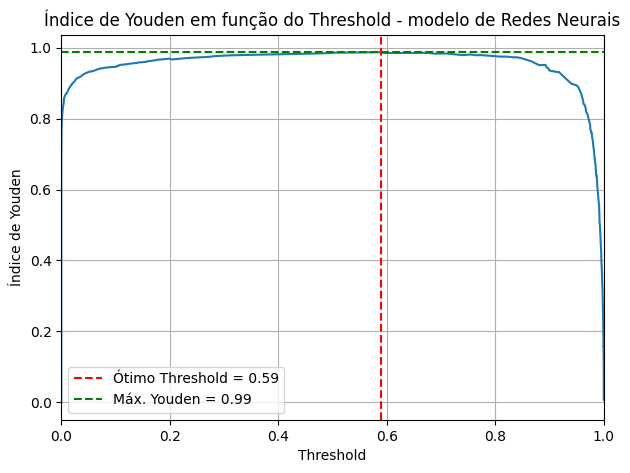

Acurácia Youden: 0.9444
Precisão Youden: 0.8088
Recall Youden: 0.8730


In [204]:
# Índice de Youden para cada threshold
# vamos calcular o índice de Youden com os dados de treino e validação, mas sem o teste!!!

y_pred_proba_nn_temp = model_final.predict(X_temp_scaled)
fpr_nn_temp, tpr_nn_temp, thresholds_nn_temp = roc_curve(y_temp, y_pred_proba_nn_temp)

youden_index_nn_temp = tpr_nn_temp - fpr_nn_temp  # equivale a sensibilidade + especificidade - 1


# Ponto ótimo
max_idx = np.argmax(youden_index_nn_temp)
best_threshold = thresholds_nn_temp[max_idx]
best_youden = youden_index_nn_temp[max_idx]

print(f"Melhor threshold: {best_threshold:.3f}")
print(f"Índice de Youden máximo: {best_youden:.3f}")

# Plot Índice de Youden x Threshold
plt.figure(figsize=(7, 5))
plt.plot(thresholds_nn_temp, youden_index_nn_temp)
plt.axvline(best_threshold, color='red', linestyle='--', 
            label=f"Ótimo Threshold = {best_threshold:.2f}")
plt.axhline(best_youden, color='green', linestyle='--', 
            label=f"Máx. Youden = {best_youden:.2f}")
plt.xlabel("Threshold")
plt.ylabel("Índice de Youden")
plt.title("Índice de Youden em função do Threshold - modelo de Redes Neurais")
plt.legend()
plt.grid(True)
plt.xlim(0, 1)
plt.show()


# Fazendo previsões no conjunto de teste usando o índice de Youden

y_pred_nn_youden = (y_pred_proba_nn > best_threshold).astype(int) # Convertendo probabilidades em classes (0 ou 1). 
# Como a sensibilidade para os clientes propensos ao cancelamento é importante, podemos colocar o limiar um pouco abaixo de 0.5 se preferirmos.

# Calculando as métricas (nos dados de teste) após a escolha do ponto ótimo 
accuracy_youden = accuracy_score(y_test, y_pred_nn_youden)
precision_youden = precision_score(y_test, y_pred_nn_youden)
recall_youden = recall_score(y_test, y_pred_nn_youden)

print(f"Acurácia Youden: {accuracy_youden:.4f}")
print(f"Precisão Youden: {precision_youden:.4f}")
print(f"Recall Youden: {recall_youden:.4f}")

In [206]:
# comparando o recall em vários thresholds:

from sklearn.metrics import recall_score

thresholds = np.linspace(0, 1, 100)
recalls_nn = []
accuracy_nn = []
precision_nn = []
f1_score_nn = []
recalls_arvore = []

for t in thresholds:
    y_pred_nn = (y_pred_proba_nn >= t).astype(int)
    y_pred_arvore = (y_pred_proba_dt >= t).astype(int)
    
    recalls_nn.append(recall_score(y_test, y_pred_nn))
    accuracy_nn.append(accuracy_score(y_test, y_pred_nn))
    precision_nn.append(precision_score(y_test, y_pred_nn))
    f1_score_nn.append(f1_score(y_test, y_pred_nn))
    recalls_arvore.append(recall_score(y_test, y_pred_arvore))


/home/rosana/.conda/envs/PD_env_redes_neurais/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


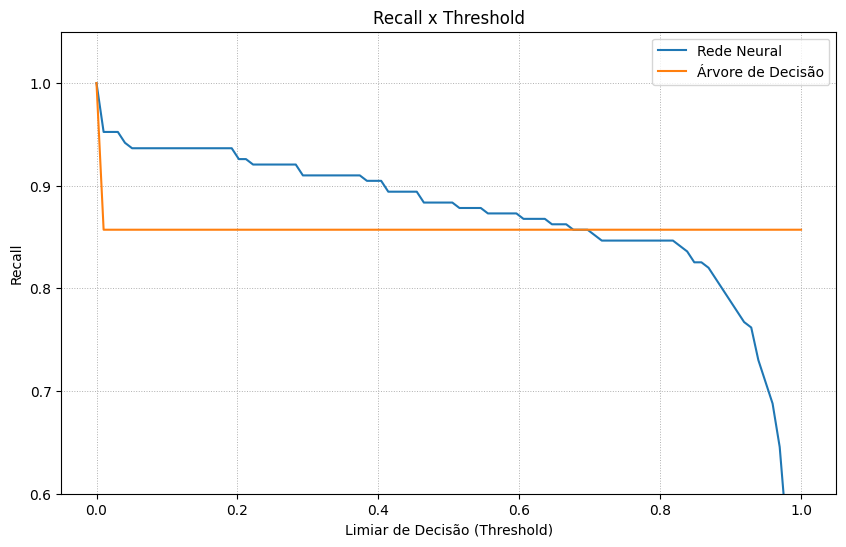

In [207]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls_nn, label='Rede Neural')
plt.plot(thresholds, recalls_arvore, label='Árvore de Decisão')
plt.xlabel('Limiar de Decisão (Threshold)')
plt.ylabel('Recall')
plt.title('Recall x Threshold')
plt.legend()
plt.grid(True, linestyle=':', linewidth=0.7)
plt.ylim(0.6)  # <-- define limite inferior do eixo y
plt.show()


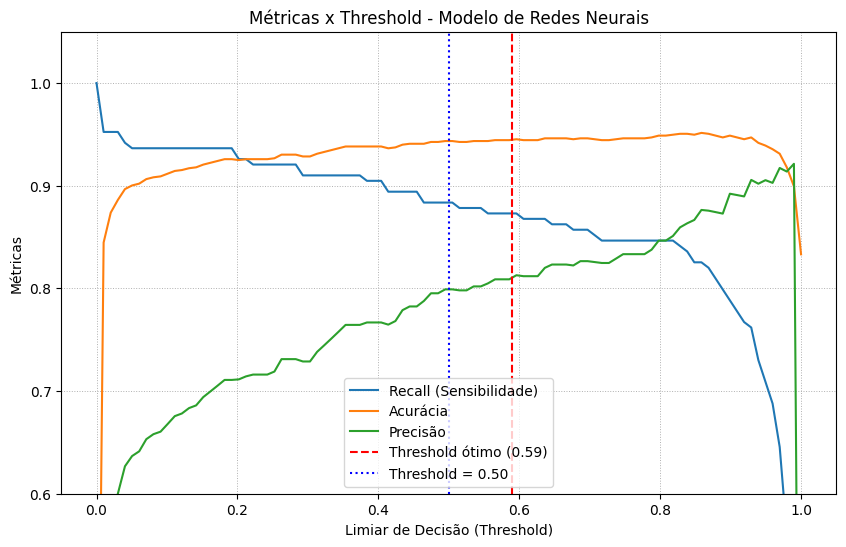

In [208]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls_nn, label='Recall (Sensibilidade)')
plt.plot(thresholds, accuracy_nn, label='Acurácia')
# plt.plot(thresholds, f1_score_nn, label='F1 Score')
plt.plot(thresholds, precision_nn, label='Precisão')

# Linhas verticais
plt.axvline(x=best_threshold, color='red', linestyle='--', label=f'Threshold ótimo ({best_threshold:.2f})')
plt.axvline(x=0.5, color='blue', linestyle=':', label='Threshold = 0.50')

plt.xlabel('Limiar de Decisão (Threshold)')
plt.ylabel('Métricas')
plt.title('Métricas x Threshold - Modelo de Redes Neurais')
plt.legend()
plt.grid(True, linestyle=':', linewidth=0.7)
plt.ylim(0.6)  # limite inferior do eixo y
plt.show()

## Referências

